In [83]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

datapath = 'C:/Users/eeaaas/Downloads/western_channel_observatory_'

In [84]:
E1_T = pd.read_csv(datapath+'e1_ctd_temperature_and_satellite.csv',header=958)
E1_S = pd.read_csv(datapath+'e1_ctd_salinity.csv',header=764)


In [85]:
E1_T.columns=['Date','Temp0m','Temp10m','Temp20m','Temp30m','Temp40m','Temp50m','Temp60m','Temp70m','Temp80m','-']
E1_S.columns=['Date','Sal0m','Sal10m','Sal20m','Sal30m','Sal40m','Sal50m','Sal60m','Sal70m','Sal80m','-']

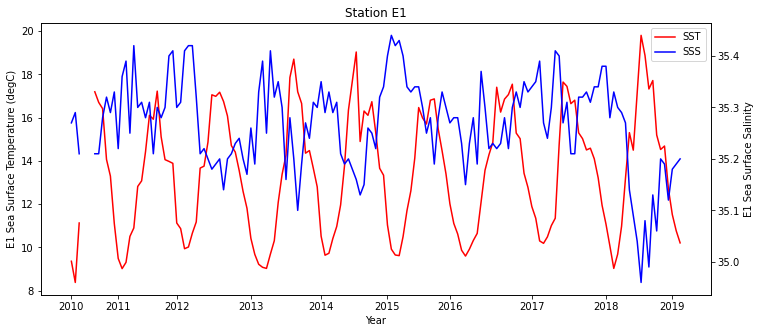

In [86]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
temp, = ax1.plot(E1_T.Date,E1_T.Temp0m,'r')
sal, = ax2.plot(E1_S.Date,E1_S.Sal0m,'b')
xt = [0,12,27,46,64,81,97,118,137,154]
xl = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
ax1.set(xlabel='Year',ylabel='E1 Sea Surface Temperature (degC)',title='Station E1')
ax2.set(ylabel='E1 Sea Surface Salinity')
plt.xticks(xt,xl)
plt.legend([temp,sal],['SST','SSS'])

Trend: SST increase in summer matched by decrease in salinity and vice versa -> links to density of surface ocean layer changing through surface heating

In [87]:
E1_Nut = pd.read_csv('C:/Users/eeaaas/Downloads/e1_nutrients.csv',header=737)
E1_Nut.columns = ['E1','Date','Depth','Nitrite','Nit+Nat','Ammonia','Silicate','Phosphate','-','-','-']

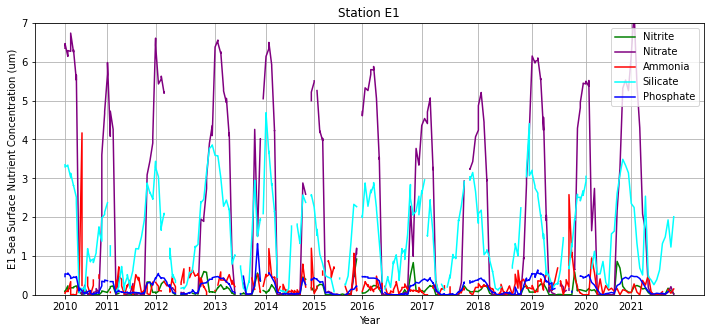

In [88]:
fig,ax1 = plt.subplots(figsize=(12,5))
nit, = ax1.plot(E1_Nut[E1_Nut['Depth']==0].Date,E1_Nut.Nitrite[E1_Nut['Depth']==0],'g')
ax1.set(xlabel='Year',ylabel='E1 Sea Surface Nutrient Concentration (um)',title='Station E1')
xt = [0,15,32,53,71,88,105,126,146,165,184,200]
xl =  ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 
plt.xticks(xt,xl)
plt.ylim(0,7)
nat, = ax1.plot(E1_Nut[E1_Nut['Depth']==0].Date,(E1_Nut['Nit+Nat'][E1_Nut['Depth']==0]-E1_Nut.Nitrite[E1_Nut['Depth']==0]),'purple')
amm, = ax1.plot(E1_Nut[E1_Nut['Depth']==0].Date,E1_Nut.Ammonia[E1_Nut['Depth']==0],'r')
sil, =ax1.plot(E1_Nut[E1_Nut['Depth']==0].Date,E1_Nut.Silicate[E1_Nut['Depth']==0],'cyan')
pho, = ax1.plot(E1_Nut[E1_Nut['Depth']==0].Date,E1_Nut.Phosphate[E1_Nut['Depth']==0],'b')
plt.legend([nit,nat,amm,sil,pho],['Nitrite','Nitrate','Ammonia','Silicate','Phosphate'])
plt.grid()


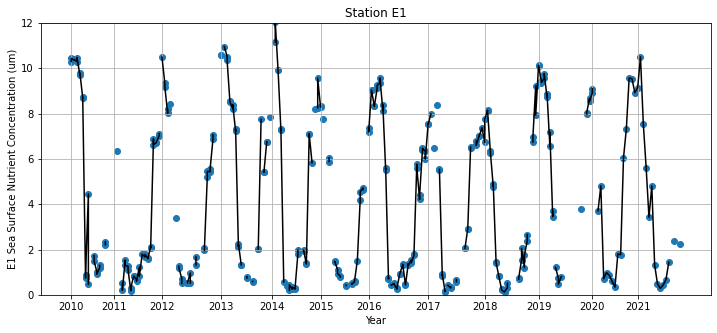

In [89]:
fig,ax1 = plt.subplots(figsize=(12,5))
ax1.plot(E1_Nut[E1_Nut['Depth']==0].Date,E1_Nut['Nit+Nat'][E1_Nut['Depth']==0]+E1_Nut.Ammonia[E1_Nut['Depth']==0]+E1_Nut.Silicate[E1_Nut['Depth']==0]+E1_Nut.Phosphate[E1_Nut['Depth']==0],'k')
ax1.scatter(E1_Nut[E1_Nut['Depth']==0].Date,E1_Nut['Nit+Nat'][E1_Nut['Depth']==0]+E1_Nut.Ammonia[E1_Nut['Depth']==0]+E1_Nut.Silicate[E1_Nut['Depth']==0]+E1_Nut.Phosphate[E1_Nut['Depth']==0])
ax1.set(xlabel='Year',ylabel='E1 Sea Surface Nutrient Concentration (um)',title='Station E1')
xt = [0,15,32,53,71,88,105,126,146,165,184,200]
xl =  ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 
plt.xticks(xt,xl)
plt.ylim(0,12)
plt.grid()

Trends wrt nutrients:
    
Dominant nutrient documented by the station is nitrate, followed by silicate and then phosphate. Peak in nutrient contents during the winter (surface mixing and redistribution of nutrients), potential secondary peak at the start of autumn